## Import 1: Classes & Path

In [1]:
# Import 1. 
# Import functions.py into notebook from src folder. 
import sys

# Path relative to your notebook.
sys.path.append("/Users/joel/Desktop/daimil10/CAPSTONE_2/Niger-Political-Shift-Examination/src")

# Import my .py classes.
import data_clean
import plots

# Auto reload.
%load_ext autoreload
%autoreload 2

## Import 2: All Libs

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

## Read File & Inital Drop of Columns

In [3]:
# Read file in.
# Dropping columns to trim data to 1996-2022.
# Use clean class and init a cleaner object.
cleaner = data_clean.Clean()

niger = cleaner.read_file('/Users/joel/Desktop/daimil10/CAPSTONE_2/Niger-Political-Shift-Examination/data/Niger.csv')
niger = niger.drop(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995'], axis=1)

# Make a metadata df for indicator name, source note, and source_org just in case.
niger_meta = cleaner.read_file('/Users/joel/Desktop/daimil10/CAPSTONE_2/Niger-Political-Shift-Examination/data/Metadata_Indicator_Descriptors.csv')

niger.head()

,Indicator Name,Indicator Code,1996,1997,1998,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Consumption of iodized salt (% of households),SN.ITK.SALT.ZS,NaN,NaN,64.8,NaN,43.4,NaN,NaN,NaN,...,NaN,59.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"International migrant stock, total",SM.POP.TOTL,NaN,NaN,NaN,NaN,122260.0,NaN,NaN,NaN,...,NaN,NaN,189255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Children in employment, wage workers (% of chi...",SL.WAG.0714.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,1.47,NaN,NaN,...,NaN,0.52,NaN,NaN,7.77,NaN,NaN,NaN,NaN,NaN
4,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,0.93,NaN,NaN,...,NaN,0.43,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN


## Describing the Dataset

In [4]:
# Describing the Dataset 1.
niger.describe()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,7.220000e+02,7.010000e+02,7.540000e+02,7.130000e+02,8.840000e+02,8.540000e+02,8.670000e+02,8.900000e+02,9.020000e+02,9.760000e+02,...,9.590000e+02,1.061000e+03,9.910000e+02,9.730000e+02,1.016000e+03,9.540000e+02,8.960000e+02,7.930000e+02,6.650000e+02,2.880000e+02
mean,4.549497e+10,4.881780e+10,5.089087e+10,5.337492e+10,4.356152e+10,4.980169e+10,5.187588e+10,5.175458e+10,5.175860e+10,5.363362e+10,...,1.100600e+11,1.063603e+11,1.197563e+11,1.277102e+11,1.290879e+11,1.496506e+11,1.697309e+11,1.853402e+11,2.441178e+11,4.816017e+11
std,2.594059e+11,2.735129e+11,2.920202e+11,3.012381e+11,2.709639e+11,3.011216e+11,3.167104e+11,3.199028e+11,3.223407e+11,3.402248e+11,...,6.449649e+11,6.538496e+11,7.207883e+11,7.683373e+11,7.966196e+11,8.943148e+11,9.780380e+11,1.039727e+12,1.220390e+12,1.804194e+12
min,-7.320000e+10,-8.152500e+10,-1.104030e+11,-9.471500e+10,-9.605800e+10,-1.094360e+11,-1.350410e+11,-1.345150e+11,-1.675050e+11,-2.201340e+11,...,-6.230320e+11,-7.428600e+11,-9.269520e+11,-7.579830e+11,-8.423970e+11,-1.029010e+12,-1.125410e+12,-1.225480e+12,-1.401350e+12,-1.625610e+12
25%,4.918478e+00,6.021677e+00,5.980128e+00,5.915937e+00,4.294313e+00,6.414036e+00,4.932095e+00,5.342783e+00,5.166796e+00,5.546792e+00,...,5.884318e+00,5.573220e+00,5.478809e+00,5.487638e+00,7.000000e+00,5.300038e+00,5.765524e+00,4.000000e+00,6.000000e+00,3.958333e+00
50%,4.835213e+01,6.200000e+01,4.755490e+01,5.771646e+01,4.008206e+01,4.532787e+01,4.130000e+01,4.109776e+01,3.994440e+01,3.907722e+01,...,4.454976e+01,3.981088e+01,4.173002e+01,4.205525e+01,3.746830e+01,4.040000e+01,4.490927e+01,4.174269e+01,5.473000e+01,3.377863e+01
75%,2.233919e+06,2.677496e+06,1.444991e+06,2.450000e+06,5.000000e+04,1.438667e+05,6.377050e+04,2.514373e+04,3.661700e+04,7.215124e+03,...,4.510000e+04,1.169999e+03,1.008817e+04,2.383697e+04,7.813750e+03,3.130450e+04,3.218892e+05,7.038785e+05,6.799690e+06,6.347849e+06
max,2.650270e+12,2.715640e+12,2.938890e+12,2.921010e+12,2.890930e+12,3.133580e+12,3.308750e+12,3.370440e+12,3.408670e+12,3.656930e+12,...,5.829080e+12,6.252250e+12,6.652170e+12,6.909400e+12,7.337100e+12,8.143540e+12,8.693310e+12,9.136430e+12,9.672180e+12,1.033930e+13


In [5]:
# Describing the Dataset 2.
niger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  1478 non-null   object 
 1   Indicator Code  1478 non-null   object 
 2   1996            722 non-null    float64
 3   1997            701 non-null    float64
 4   1998            754 non-null    float64
 5   1999            713 non-null    float64
 6   2000            884 non-null    float64
 7   2001            854 non-null    float64
 8   2002            867 non-null    float64
 9   2003            890 non-null    float64
 10  2004            902 non-null    float64
 11  2005            976 non-null    float64
 12  2006            1016 non-null   float64
 13  2007            978 non-null    float64
 14  2008            962 non-null    float64
 15  2009            1005 non-null   float64
 16  2010            1006 non-null   float64
 17  2011            1043 non-null   f

In [6]:
# Describing the Dataset 3.
niger.index

RangeIndex(start=0, stop=1478, step=1)

In [7]:
# Describing the Dataset 4.
niger.columns

Index(['Indicator Name', 'Indicator Code', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [8]:
# Describing the Dataset 5.
missing_v = niger.isnull().sum()
missing_v

Indicator Name       0
Indicator Code       0
1996               756
1997               777
1998               724
1999               765
2000               594
2001               624
2002               611
2003               588
2004               576
2005               502
2006               462
2007               500
2008               516
2009               473
2010               472
2011               435
2012               400
2013               519
2014               417
2015               487
2016               505
2017               462
2018               524
2019               582
2020               685
2021               813
2022              1190
dtype: int64

In [9]:
# Describing the Dataset 6.
# Using the function that spits outdict of col names and dtypes. 
cleaner.get_column_features(niger)

{'Indicator Name': dtype('O'),
 'Indicator Code': dtype('O'),
 '1996': dtype('float64'),
 '1997': dtype('float64'),
 '1998': dtype('float64'),
 '1999': dtype('float64'),
 '2000': dtype('float64'),
 '2001': dtype('float64'),
 '2002': dtype('float64'),
 '2003': dtype('float64'),
 '2004': dtype('float64'),
 '2005': dtype('float64'),
 '2006': dtype('float64'),
 '2007': dtype('float64'),
 '2008': dtype('float64'),
 '2009': dtype('float64'),
 '2010': dtype('float64'),
 '2011': dtype('float64'),
 '2012': dtype('float64'),
 '2013': dtype('float64'),
 '2014': dtype('float64'),
 '2015': dtype('float64'),
 '2016': dtype('float64'),
 '2017': dtype('float64'),
 '2018': dtype('float64'),
 '2019': dtype('float64'),
 '2020': dtype('float64'),
 '2021': dtype('float64'),
 '2022': dtype('float64')}

## Project Goal #1:
Examine overall World Governance Index from 1996 to 2022 (26 year span).
- Political Stability and Absence of Violence/Terrorism measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

- Control of Corruption captures perceptions of the extent to which public power is exercised for private gain, including both petty and grand forms of corruption, as well as "capture" of the state by elites and private interests. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

- Goverment Effectivness: captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

In [10]:
# Slice DF by PV.EST, CC.EST, GE.EST, RQ.EST, VA.EST, RL.EST indicator code which all make up the world governance index.
indicator_codes = ['PV.EST', 'CC.EST', 'GE.EST']
PG1 = niger[niger['Indicator Code'].isin(indicator_codes)]

# Using replace for the labels since they are kinda long
PG1['Indicator Name'] = PG1['Indicator Name'].replace('Political Stability and Absence of Violence/Terrorism: Estimate','Political Stability')
PG1['Indicator Name'] = PG1['Indicator Name'].replace('Control of Corruption: Estimate','Control of Corruption')
PG1['Indicator Name'] = PG1['Indicator Name'].replace('Government Effectiveness: Estimate','Government Effectiveness')

# No Data for 1997, 1999, 2001, 2022
PG1 = PG1.drop(['1997', '1999', '2001', '2022'], axis=1)

/tmp/ipykernel_38795/142343216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PG1['Indicator Name'] = PG1['Indicator Name'].replace('Political Stability and Absence of Violence/Terrorism: Estimate','Political Stability')
/tmp/ipykernel_38795/142343216.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PG1['Indicator Name'] = PG1['Indicator Name'].replace('Control of Corruption: Estimate','Control of Corruption')
/tmp/ipykernel_38795/142343216.py:8: SettingWithCopyWarning: 
A value is trying to be set 

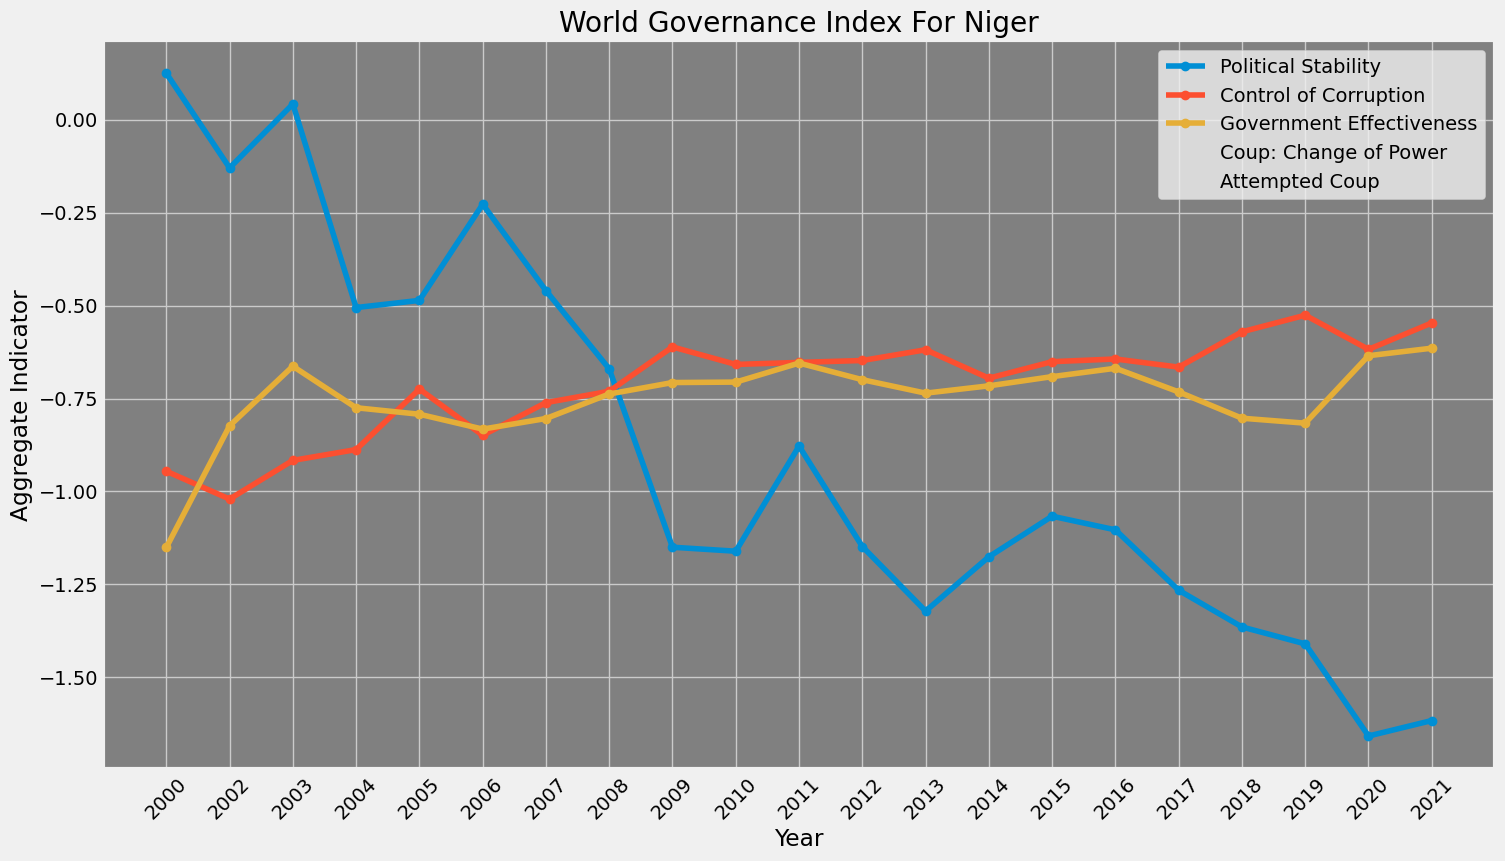

In [11]:
# Use the style that i like.
style.use('fivethirtyeight')

# Figsize.
plt.figure(figsize=(16, 9))

# Plot each indicator code separately.
for indicator in indicator_codes:
    # Not to repeat.
    if indicator in PG1['Indicator Code'].unique():
        # Using indicator code to cycle through
        indicator_data = PG1[PG1['Indicator Code'] == indicator]
        # X = Year, Y= Aggregated Indicator Scale.
        # values.flatten for the list of values.
        # F string for label, used in last project.
        plt.plot(indicator_data.columns[4:], indicator_data.iloc[:, 4:].values.flatten(), marker='o', label=f'{indicator_data["Indicator Name"].iloc[0]}')

# Label and title.
plt.xlabel('Year', color='black')
plt.ylabel('Aggregate Indicator', color='black')
plt.title('World Governance Index For Niger', color='black')

#Label for Coup: Change of Power.
plt.plot([], [], ' ', label="Coup: Change of Power")

#Label for Attempted Coup.
plt.plot([], [], ' ', label="Attempted Coup")

# Set the background color to white.
plt.gca().set_facecolor('grey')

# Using all the years present for the xticks.
# Set the tick color to black.
plt.xticks(rotation=45)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

# Show the legend.
plt.legend()

# plt.show.
plt.show()

## Project Goal #2:
Explore Economic Indicators over specified time frame.

- Inflation: as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.

- GDP Annual %: Annual percentage growth rate of GDP at market prices based on constant local currency. Aggregates are based on constant 2015 prices, expressed in U.S. dollars. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.

- Unemployment: refers to the share of the labor force that is without work but available for and seeking employment.

In [12]:
# For some reason some of the indicator codes were not populating.
# Made me do the long way istead.

# GDP growth annual.
a = niger[niger['Indicator Code'] == 'NY.GDP.MKTP.KD.ZG']
# Inflation.
b = niger[niger['Indicator Code'] == 'FP.CPI.TOTL.ZG']
# Unemployment
c = niger[niger['Indicator Code'] == 'SL.UEM.TOTL.ZS'] 

# Combine them vertically (stacked like).
PG2 = pd.concat([a, b, c], axis=0)

# Reset the index of the combined data frame (cause it was funky).
PG2 = PG2.reset_index(drop=True)

# Everything lines up for 25 years.
PG2.isnull().sum()

Indicator Name    0
Indicator Code    0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
dtype: int64

In [13]:
# Drop Indicator code, cause it will not be needed.
PG2 = PG2.drop(['Indicator Code'], axis=1)

In [14]:
# https://www.macrotrends.net/countries/WLD/world/inflation-rate-cpi
world_inflation = [3.50, 1.92, 2.19, 2.44, 2.19, 1.55, 1.43, 2.35, 2.62, 3.73, 4.82, 3.35, 2.93, 8.95, 4.81, 4.27, 4.11, 3.52, 3.03, 2.91, 3.84, 3.43, 3.04, 5.10, 5.55, 6.53]
world_infla_mean = np.mean(world_inflation)

# https://www.macrotrends.net/countries/WLD/world/gdp-gross-domestic-product
world_GDP = [5.87, -3.12, 2.59, 3.29, 3.39, 2.80, 3.08, 3.09, 2.81, 2.71, 3.31, 4.54, -1.34, 2.07, 4.38, 4.42, 4.00, 4.47, 3.11, 2.30, 2.01, 4.52, 3.55, 2.82, 3.88, 3.59]
world_gdp_mean = np.mean(world_GDP)

# https://www.macrotrends.net/countries/WLD/world/unemployment-rate
world_unemploy = [6.18, 6.58, 5.36, 5.40, 5.56, 5.66, 5.63, 5.61, 5.73, 5.74, 5.77, 5.90, 6.00, 5.41, 5.42, 5.63, 5.90, 6.00, 6.16, 6.07, 5.85, 5.76, 5.96, 5.85, 5.70, 5.70]
world_unemploy_mean = np.mean(world_unemploy)

In [15]:
# https://data.worldbank.org/country/niger
niger_unemploy = [2.027, 1.99, 1.92, 1.939, 1.913, 1.841, 2.614, 3.355, 4.047, 4.586, 3.748, 2.937, 2.11, 1.374, 0.68, 0.156, 5.333, 2.919, 0.403, 0.425, 0.446, 0.468, 0.489, 0.512, 0.787, 0.312, 0.256]
niger_unemploy_mean = np.mean(niger_unemploy)

niger_inflation = [5.288857513, 2.933452534, 4.548015777, -2.302125038, 2.900149736, 4.005514284, 2.628865979, -1.614407692, 0.262543757, 7.797497818, 0.04048583, 0.053959261, 11.30510988, 0.582906591, 0.804073081, 2.94238514, 0.45508982, 2.29723115, -0.93028726, -0.57609037, 1.653889224, 2.796373189, 2.96760366, -2.489792651, 2.89819376, 3.837868028, 4.226217919]
niger_inflation_mean = np.mean(niger_inflation)

niger_gdp = [9.972614956, -0.219562518, -1.208477741, 7.268134902, 4.918470576, 2.170610384, 0.363801579, 7.331868843, 5.931049974, 3.142724084, 7.731414228, 1.962600907, 8.578166743, 2.357756936, 10.54894458, 5.315130634, 6.642136655, 4.392648832, 5.740893151, 5.001359945, 7.210803008, 5.941396863, 3.550227506, 1.387129177, 11.50000492]
niger_gdp_mean = np.mean(niger_gdp)

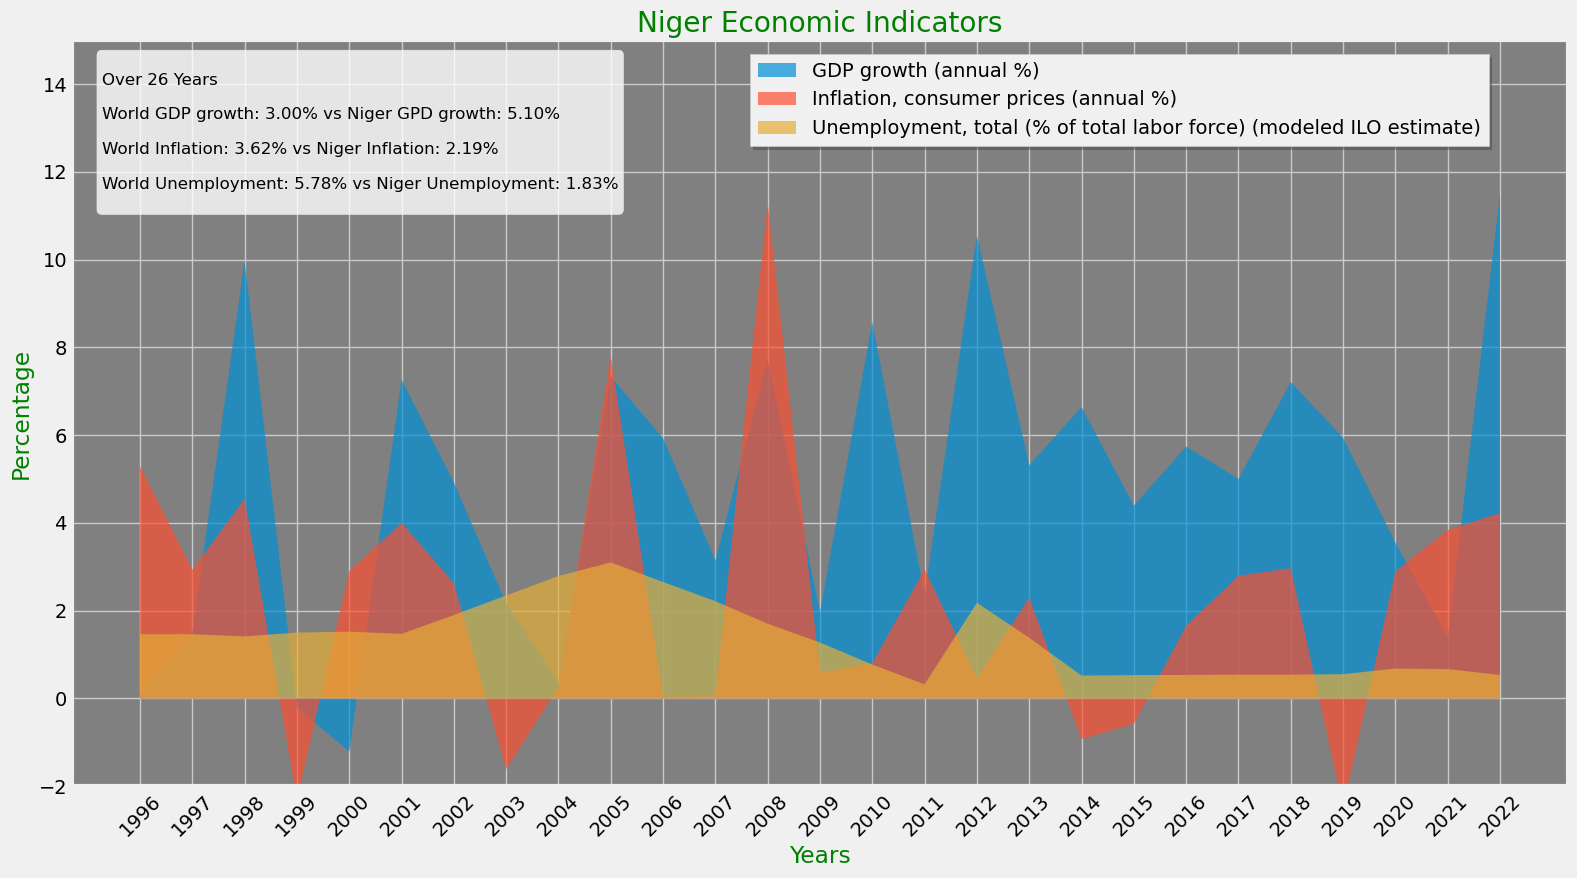

In [16]:
# Set the 'Indicator Name' column as the index (optional but might help in chart labeling)
PG2.set_index('Indicator Name', inplace=True)

# Transpose the DataFrame to make years as columns and indicators as rows
df_transposed = PG2.T

# Select the range of years and indicators for the chart
years = df_transposed.index
indicators = df_transposed.columns

# Plot the stacked area chart
plt.figure(figsize=(16, 9))

# Loop through the indicators and plot each one as a stacked area
for indicator in indicators:
    plt.fill_between(years, df_transposed[indicator], alpha=0.7, label=indicator)

# Set plot properties
plt.xlabel('Years', color='green')
plt.ylabel('Percentage', color='green')
plt.title('Niger Economic Indicators', color='green')
plt.gca().set_facecolor('grey')
plt.xticks(rotation=45)
plt.legend(loc='center', bbox_to_anchor=(0.7, 0.92), fancybox=False, shadow=True, ncol=1)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.ylim(-2, 15)

# Add a text box with information
text_box = '''
Over 26 Years

World GDP growth: 3.00% vs Niger GPD growth: 5.10%

World Inflation: 3.62% vs Niger Inflation: 2.19%

World Unemployment: 5.78% vs Niger Unemployment: 1.83%
'''
plt.text(0.02, 0.98, text_box, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Show the plot
plt.tight_layout()
plt.show()

## Project Goal #3:
Highlight Political Regime Metrics (multiple coups and multiple leaders). 

In [17]:
# Reuse Gov Effectivness code.
indicator_codes = ['GE.EST']
PG3 = niger[niger['Indicator Code'].isin(indicator_codes)]

# Using replace for the labels since they are kinda long.
PG3['Indicator Name'] = PG3['Indicator Name'].replace('Government Effectiveness: Estimate', 'Government Effectiveness')

# Get the column names for the years of each leader's reign.
# 1996 - 1999: Ibrahim Bare Mainassara.
# 1999 - 2010: Mamadou Tandja.
# 2011- 2021:  Mahamadou Issoufou.
brahim_years = ['1996', '1997', '1998', '1999']
mamadou_years = ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']
issoufou_years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Extract data for each leader's reign
# https://www.geeksforgeeks.org/flatten-a-list-of-dataframes/
# will never forget .values.flatten now.
brahim_scores = PG3[brahim_years].values.flatten()
mamadou_scores = PG3[mamadou_years].values.flatten()
issoufou_scores = PG3[issoufou_years].values.flatten()

# Remove missing or invalid data (e.g., NaN)
# 1996 regime has missing values - along with 2022 era which isnt really chartable. 
brahim_scores = [score for score in brahim_scores if pd.notnull(score)]
mamadou_scores = [score for score in mamadou_scores if pd.notnull(score)]
issoufou_scores = [score for score in issoufou_scores if pd.notnull(score)]

# get the mean for the callout
# will use these for the floating text boxs.
b_mean = np.mean(brahim_scores)
m_mean = np.mean(mamadou_scores)
i_mean = np.mean(issoufou_scores)

# Combine the data into a DataFrame to use. 
data = pd.DataFrame({'Leader': ['Ibrahim Bare Mainassara'] * len(brahim_scores) +
                                ['Mamadou Tandja'] * len(mamadou_scores) +
                                ['Mahamadou Issoufou'] * len(issoufou_scores),
                     'Government Effectiveness Score': brahim_scores + mamadou_scores + issoufou_scores})

/tmp/ipykernel_38795/936825500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PG3['Indicator Name'] = PG3['Indicator Name'].replace('Government Effectiveness: Estimate', 'Government Effectiveness')


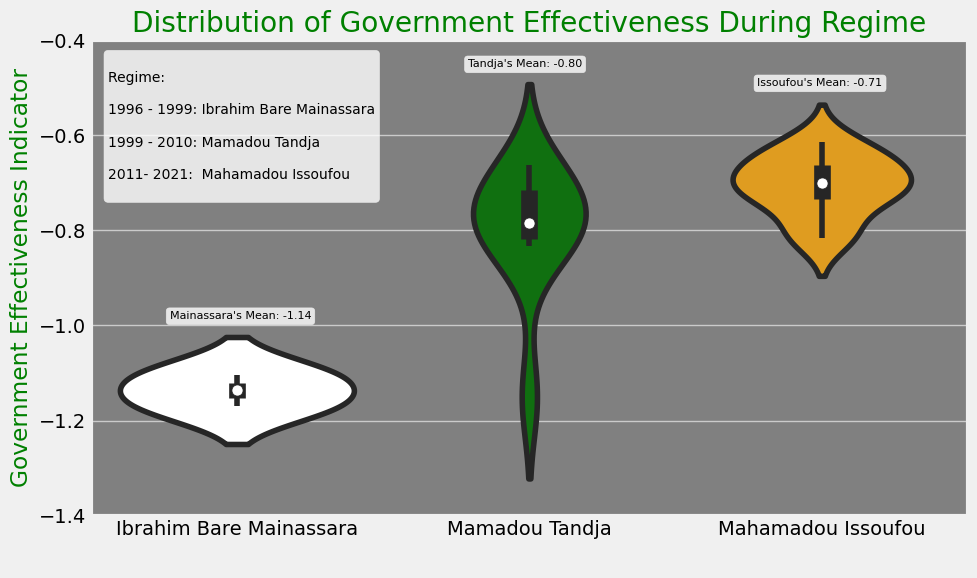

In [18]:
# Create the violin plot.
new_colors = ['white', 'green', 'orange']
plt.figure(figsize=(10, 6))
sns.violinplot(x='Leader', y='Government Effectiveness Score', data=data, palette= new_colors)

plt.gca().set_facecolor('grey')

# Add a text box with information.
text_1 = '''
Regime: 

1996 - 1999: Ibrahim Bare Mainassara

1999 - 2010: Mamadou Tandja

2011- 2021:  Mahamadou Issoufou
'''
plt.text(0.02, 0.97, text_1, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


# Add a text box with information.
text_2 = f"Mainassara's Mean: {b_mean:.2f}"
plt.text(0.09, 0.43, text_2, transform=plt.gca().transAxes, fontsize=8,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add a text box with information.
text_3 = f"Tandja's Mean: {m_mean:.2f}"
plt.text(0.43, 0.96, text_3, transform=plt.gca().transAxes, fontsize=8,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add a text box with information.
text_4 = f"Issoufou's Mean: {i_mean:.2f}"
plt.text(0.76, 0.92, text_4, transform=plt.gca().transAxes, fontsize=8,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add labels and title.
plt.ylabel("Government Effectiveness Indicator", color='green')
plt.xlabel(" ")
plt.title("Distribution of Government Effectiveness During Regime", color='green')
plt.ylim(-1.4, -0.4)

# Display the plot.
plt.tight_layout()
plt.show()

## Project Goal #4:
Uncover data points related to corruption perception index & economic indicators. 


In [19]:
niger_fa = cleaner.read_file('/Users/joel/Desktop/daimil10/CAPSTONE_2/Niger-Political-Shift-Examination/data/niger_forgien_aid.csv')
niger_fa.head()

,Managing Agency ID,Managing Agency Name,Managing Sub-agency or Bureau Name,Implementing Partner Category Name,Implementing Partner Sub-category ID,Implementing Partner Name,International Category Name,International Sector Name,International Purpose Name,US Category Name,...,Funding Account Name,Funding Agency Name,Funding Agency Acronym,Activity ID,Activity Name,Activity Description,Activity Project Number,Fiscal Year,Current Dollar Amount,Constant Dollar Amount
0,1,U.S. Agency for International Development,Bureau for Humanitarian Assistance,Multilateral,Multilateral - United Nations,World Food Program,Humanitarian,Emergency Response,Relief co-ordination; protection and support s...,Humanitarian Assistance,...,"Agency for International Development, Internat...",U.S. Agency for International Development,USAID,187642,Emergency food assistance,Emergency humanitarian food and nutirition ass...,720BHA22IO00082,2022,25000000,24059426
1,1,U.S. Agency for International Development,Bureau for Humanitarian Assistance,Multilateral,Multilateral - United Nations,World Food Program,Humanitarian,Emergency Response,Relief co-ordination; protection and support s...,Humanitarian Assistance,...,"Agency for International Development, Internat...",U.S. Agency for International Development,USAID,187622,Emergency food and nutrition assistance,Emergency humanitarian food and nutirition ass...,720BHA22IO00050,2022,19500000,18766352
2,1,U.S. Agency for International Development,Bureau for Humanitarian Assistance,Multilateral,Multilateral - United Nations,World Food Program,Humanitarian,Emergency Response,Relief co-ordination; protection and support s...,Humanitarian Assistance,...,"Agency for International Development, Internat...",U.S. Agency for International Development,USAID,187423,Emergency Humanitarian Assistance,Emergency humanitarian food and nutirition ass...,720BHA22IO00122,2022,12000000,11548525
3,1,U.S. Agency for International Development,Bureau for Resilience and Food Security,Church and Faith Based,Church and Faith Based - United States,Church and Faith Based - United States Redacted,Agriculture,Agriculture,Agricultural policy and administrative management,Economic Development,...,"Agency for International Development, Developm...",U.S. Agency for International Development,USAID,179492,FY18 Development Food Assistance Program in Ni...,The USAID Implementing Partner's Development F...,72DFFP18CA00003,2022,9933801,9560063
4,1,U.S. Agency for International Development,Bureau for Africa,Enterprises,Enterprises - United States,Enterprise - United States Redacted,Health and Population,Basic Health,Malaria control,Health,...,"Department of State, Global Health Programs",Department of State,STATE,173837,Global Health Supply Chain - Procurement and S...,"To provide USAID Missions, Bureaus and operati...",AID-OAA-TO-15-00009,2022,6727500,6474392


In [20]:
# Describing the Dataset FA 1.
niger_fa.describe()

,Managing Agency ID,Activity ID,Fiscal Year,Current Dollar Amount,Constant Dollar Amount
count,3325.000000,3325.000000,3325.000000,3.325000e+03,3.325000e+03
mean,2.916090,165077.852030,2014.645714,8.369381e+05,9.242519e+05
std,4.805282,81555.032515,5.882183,3.671580e+06,3.926459e+06
min,1.000000,2.000000,1996.000000,-2.209200e+07,-2.277080e+07
25%,1.000000,126968.000000,2011.000000,1.196300e+04,1.338500e+04
50%,1.000000,170729.000000,2016.000000,1.107910e+05,1.321950e+05
75%,2.000000,199414.000000,2020.000000,6.000000e+05,6.918000e+05
max,32.000000,461482.000000,2022.000000,1.086930e+08,1.157414e+08


In [21]:
# Describing the Dataset 2.
niger_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3325 entries, 0 to 3324
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Managing Agency ID                    3325 non-null   int64 
 1   Managing Agency Name                  3325 non-null   object
 2   Managing Sub-agency or Bureau Name    3325 non-null   object
 3   Implementing Partner Category Name    3325 non-null   object
 4   Implementing Partner Sub-category ID  3325 non-null   object
 5   Implementing Partner Name             3325 non-null   object
 6   International Category Name           3325 non-null   object
 7   International Sector Name             3325 non-null   object
 8   International Purpose Name            3325 non-null   object
 9   US Category Name                      3325 non-null   object
 10  US Sector Name                        3325 non-null   object
 11  Funding Account Name          

In [22]:
# Describing the Dataset 3.
niger_fa.index

RangeIndex(start=0, stop=3325, step=1)

In [23]:
# Describing the Dataset 4.
niger_fa.columns

Index(['Managing Agency ID', 'Managing Agency Name',
       'Managing Sub-agency or Bureau Name',
       'Implementing Partner Category Name',
       'Implementing Partner Sub-category ID', 'Implementing Partner Name',
       'International Category Name', 'International Sector Name',
       'International Purpose Name', 'US Category Name', 'US Sector Name',
       'Funding Account Name', 'Funding Agency Name', 'Funding Agency Acronym',
       'Activity ID', 'Activity Name', 'Activity Description',
       'Activity Project Number', 'Fiscal Year', 'Current Dollar Amount',
       'Constant Dollar Amount'],
      dtype='object')

In [24]:
# Describing the Dataset 5.
missing_v_fa = niger_fa.isnull().sum()
missing_v_fa

Managing Agency ID                         0
Managing Agency Name                       0
Managing Sub-agency or Bureau Name         0
Implementing Partner Category Name         0
Implementing Partner Sub-category ID       0
Implementing Partner Name                  0
International Category Name                0
International Sector Name                  0
International Purpose Name                 0
US Category Name                           0
US Sector Name                             0
Funding Account Name                       0
Funding Agency Name                        0
Funding Agency Acronym                     0
Activity ID                                0
Activity Name                              0
Activity Description                       0
Activity Project Number                 1532
Fiscal Year                                0
Current Dollar Amount                      0
Constant Dollar Amount                     0
dtype: int64

In [25]:
# Describing the Dataset 6.
# Using the function that spits outdict of col names and dtypes. 
cleaner.get_column_features(niger_fa)

{'Managing Agency ID': dtype('int64'),
 'Managing Agency Name': dtype('O'),
 'Managing Sub-agency or Bureau Name': dtype('O'),
 'Implementing Partner Category Name': dtype('O'),
 'Implementing Partner Sub-category ID': dtype('O'),
 'Implementing Partner Name': dtype('O'),
 'International Category Name': dtype('O'),
 'International Sector Name': dtype('O'),
 'International Purpose Name': dtype('O'),
 'US Category Name': dtype('O'),
 'US Sector Name': dtype('O'),
 'Funding Account Name': dtype('O'),
 'Funding Agency Name': dtype('O'),
 'Funding Agency Acronym': dtype('O'),
 'Activity ID': dtype('int64'),
 'Activity Name': dtype('O'),
 'Activity Description': dtype('O'),
 'Activity Project Number': dtype('O'),
 'Fiscal Year': dtype('int64'),
 'Current Dollar Amount': dtype('int64'),
 'Constant Dollar Amount': dtype('int64')}

In [26]:
# Only column with missing values, dont need it anyway
niger_fa = niger_fa.drop(['Activity Project Number'], axis=1)

## Project Goal #5:
Hypo test (1, 2, 3, 4, or 5)

## Project Goal #6:
Linear Model (1, 2, or 3)